<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [175]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [176]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [177]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')

des= df.describe()
des.loc['NaN'] = df.isna().sum()
des.loc['%Nan']= (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
NaN,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [178]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df1 = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [180]:
df1.shape[0]

891

In [181]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df1.dropna()

In [182]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
print('Cantidad de filas para analizar:', df_clean.shape[0])

Cantidad de filas para analizar: 714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [183]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


cantidad de personas que sobrevivieron: 290
cantidad de personas que no sobrevivieron: 424


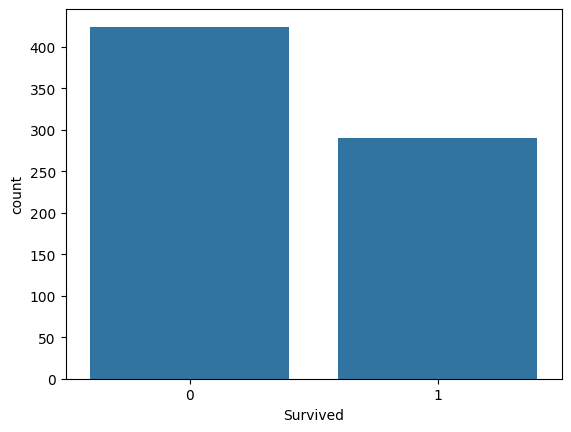

In [184]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
print('cantidad de personas que sobrevivieron:', df_clean['Survived'].value_counts()[1])
print('cantidad de personas que no sobrevivieron:', df_clean['Survived'].value_counts()[0])
sns.countplot(data=df_clean, x= 'Survived' )
plt.show()

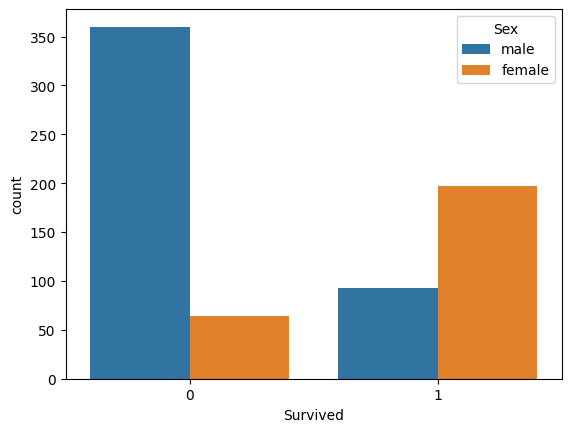

In [185]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df_clean, x= 'Survived', hue= 'Sex' )
plt.show()

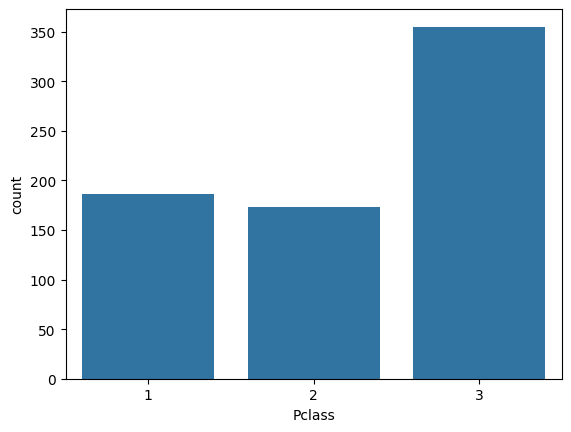

In [186]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(data=df_clean, x= 'Pclass' )
plt.show()

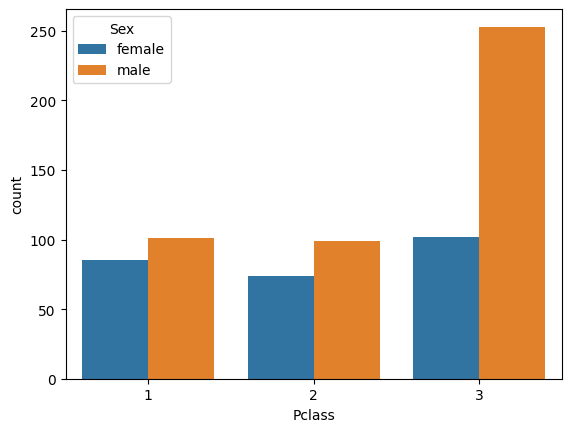

In [187]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df_clean, x= 'Pclass', hue= 'Sex' )
plt.show()

#### Transformar variables categóricas texto a clases numeradas

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod= df_clean.copy()

In [190]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le_sex = LabelEncoder()
label_encoder = le_sex.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoder
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [191]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le_sex.classes_

array(['female', 'male'], dtype=object)

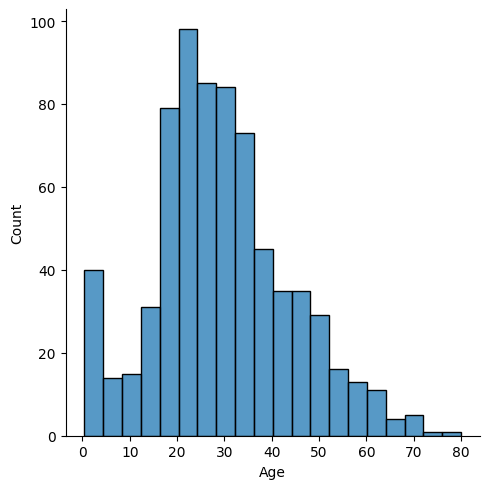

In [192]:
# Alumno: Analizar la distribución de la edad
sns.displot(data=df_cod, x= 'Age' )

In [193]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod1= df_cod.copy()
df_cod1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0


In [194]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_cod1.loc[:,'Age']= scaler.fit_transform(df_cod1[['Age']])
df_cod1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [195]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod1.drop('Survived', axis= 1).values
y = df_cod['Survived'].values

In [196]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape= X.shape[1]

In [197]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape= 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [198]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
def create_model(input_size, hidden_neurons, output_size):
    model= Sequential()

    #capa oculta
    model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(input_size,)))
    #capa de salida
    model.add(Dense(units=output_size, activation='sigmoid'))

    return model

In [200]:
model = create_model(in_shape, 20, out_shape)

In [201]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
import tensorflow as tf
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.005),
              loss='binary_crossentropy',
              metrics= ['accuracy'])

In [202]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history= model.fit(X_train, y_train, validation_split=0.2, epochs= 65, batch_size= 32)

Epoch 1/65
15/15 [==============================] - 1s 27ms/step - loss: 0.6693 - accuracy: 0.5636 - val_loss: 0.6840 - val_accuracy: 0.5478
Epoch 2/65
15/15 [==============================] - 0s 7ms/step - loss: 0.6409 - accuracy: 0.6031 - val_loss: 0.6663 - val_accuracy: 0.5478
Epoch 3/65
15/15 [==============================] - 0s 7ms/step - loss: 0.6221 - accuracy: 0.6096 - val_loss: 0.6466 - val_accuracy: 0.5913
Epoch 4/65
15/15 [==============================] - 0s 8ms/step - loss: 0.6082 - accuracy: 0.6360 - val_loss: 0.6404 - val_accuracy: 0.5913
Epoch 5/65
15/15 [==============================] - 0s 7ms/step - loss: 0.5946 - accuracy: 0.6952 - val_loss: 0.6189 - val_accuracy: 0.6783
Epoch 6/65
15/15 [==============================] - 0s 7ms/step - loss: 0.5783 - accuracy: 0.7149 - val_loss: 0.6140 - val_accuracy: 0.6696
Epoch 7/65
15/15 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7259 - val_loss: 0.6008 - val_accuracy: 0.7043
Epoch 8/65
15/15 [=

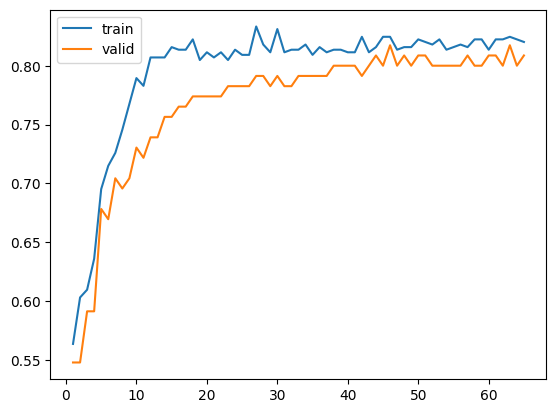

In [203]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epocas_conteo = range(1, len(history.history['accuracy'])+1)

sns.lineplot(x= epocas_conteo, y=history.history['accuracy'], label='train')
sns.lineplot(x= epocas_conteo, y=history.history['val_accuracy'], label='valid')

plt.show()

In [204]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob=  model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [205]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x > 0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [206]:
# Alumno, calcular la exactitud (accuracy) de su modelo
scores = model.evaluate(X_test, y_test)
scores[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7762


0.7762237787246704

In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize= True)

0.7762237762237763

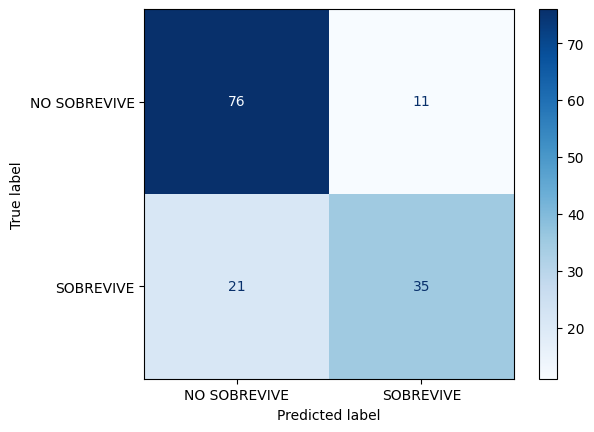

In [208]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat)

cmd = ConfusionMatrixDisplay(cm, display_labels=['NO SOBREVIVE', 'SOBREVIVE'])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [209]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


In [210]:
prueba = pd.DataFrame({'Pclass':[3], 'Sex':['male'], 'Age': [20], 'SibSp':[1], 'Parch':[0]})
prueba

,Pclass,Sex,Age,SibSp,Parch
0,3,male,20,1,0


In [211]:
prueba['Sex'] = le_sex.transform(prueba['Sex'])
prueba['Age']= scaler.transform(prueba[['Age']])

In [212]:
prueba

,Pclass,Sex,Age,SibSp,Parch
0,3,1,-0.668153,1,0


In [213]:
#visualizando los datos
X_prueba = prueba.values
X_prueba

array([[ 3.       ,  1.       , -0.6681526,  1.       ,  0.       ]])

In [214]:
prediccion = model.predict(X_prueba)

1/1 [==============================] - 0s 39ms/step


In [217]:
resultado = [1 if x > 0.5 else 0 for x in prediccion]
print(['¡Sobreviviste!' if x == 1 else '¡Eres un zombie!' for x in resultado])

['¡Eres un zombie!']
